# Motivational Example


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [1]:
import numpy as np

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [3]:
from keras.datasets import mnist

In [4]:
mnist.load_data?

https://keras.io/datasets/

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Explore Data

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0]

5

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
import matplotlib.pyplot as plt

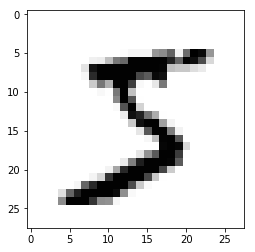

In [14]:
plt.imshow(x_train[0], cmap='Greys');

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## NN Architecture

In [19]:
from keras import models
from keras import layers

https://keras.io/getting-started/sequential-model-guide/

In [20]:
model = models.Sequential()

In [ ]:
layers.Dense?

In [21]:
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [22]:
model.add(layers.Dense(units=10,
                       activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [25]:
x_train_input.dtype

dtype('uint8')

In [26]:
x_train_input.min()

0

In [27]:
x_train_input.max()

255

In [28]:
x_train_input = x_train_input.astype('float32') / 255

In [29]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [30]:
x_test_input = x_test_input.astype('float32') / 255

compile model

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one hot encode the target variable 

In [32]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model fitting

In [33]:
model.fit(x_train_input, y_train,
          epochs=10,
          batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3141 - acc: 0.9111
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1285 - acc: 0.9620
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0848 - acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0616 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0478 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0364 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0283 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0226 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0175 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0140 - acc: 0.9963

test the model on test set or predict

In [34]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

10000/10000 [==============================] - 1s 60us/step


In [35]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9815


# Tensor Operations Example

Element-wise operations

Broadcasting

Dot product

Reshaping


### Element-wise operations

In [36]:
x1 = np.array([2, -1, 4])
x2 = np.array([1, 2, 3])

In [37]:
x1 + x2    # element-wise operations

array([3, 1, 7])

In [38]:
np.maximum(x1, 0)    # element-wise operations

array([2, 0, 4])

### Broadcasting

Smaller tensor will be broadcasted to match the shape of the larger tensor

In [39]:
x1 + 2    # broadcasting scalar (2) to vector (x1)

array([4, 1, 6])

In [40]:
x3 = np.array([[1, 1], [2, 2]])
x3

array([[1, 1],
       [2, 2]])

In [41]:
x3 + 2

array([[3, 3],
       [4, 4]])

In [42]:
x4 = np.array([-1, -1])
x4

array([-1, -1])

In [43]:
x3 + x4    # broadcasting vector (x3) to matrix (x4)

array([[0, 0],
       [1, 1]])

### dot product

In [45]:
x1

array([ 2, -1,  4])

In [46]:
np.dot(x1, x1)

21

In [47]:
np.dot(x1, x1.T)

21

In [48]:
x3

array([[1, 1],
       [2, 2]])

In [49]:
x4

array([-1, -1])

In [50]:
np.dot(x3, x4.T)

array([-2, -4])

In [51]:
np.dot(x3, x4)

array([-2, -4])

In [52]:
x5 = np.array([[1, 1], [2, 2], [4, 5]])
x6 = np.array([[1, 2, 3], [3, 1, 2]])

In [53]:
x5.shape

(3, 2)

In [54]:
x6.shape

(2, 3)

In [55]:
np.dot(x5, x6)

array([[ 4,  3,  5],
       [ 8,  6, 10],
       [19, 13, 22]])

In [56]:
np.dot(x5, x6.T)

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

### Reshaping

In [57]:
x3

array([[1, 1],
       [2, 2]])

In [58]:
print(x3.reshape(-1, 1))
print(x3.reshape(-1, 1).shape)

[[1]
 [1]
 [2]
 [2]]
(4, 1)


In [59]:
print(x3.reshape(1, -1))
print(x3.reshape(1, -1).shape)

[[1 1 2 2]]
(1, 4)


In [60]:
print(x3.reshape(1, 4))
print(x3.reshape(1, 4).shape)

[[1 1 2 2]]
(1, 4)


In [61]:
print(x3.reshape(4,))
print(x3.reshape(4,).shape)

[1 1 2 2]
(4,)


In [62]:
print(x3.ravel())
print(x3.ravel().shape)

[1 1 2 2]
(4,)


In [63]:
x3

array([[1, 1],
       [2, 2]])

In [64]:
x3.ndim

2

In [65]:
x3.shape

(2, 2)

In [66]:
x3.dtype

dtype('int64')

# SGD

$$y = wx + b$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
x = np.round(np.arange(-4, 4.1, 0.1), 1)
y = x >0    # we ignore the bias term for now

In [ ]:
plt.scatter(x, y);

Let's assumed x and y values are fixed. We are trying to find the gradient of y relative to w.

We try three values of w:
- 0.99, 1.0, 1.01

In [ ]:
idx = np.where(x == 1)

In [ ]:
x[idx]

In [ ]:
y[idx]

In [ ]:
def delta(obj):
    return 1 / (1 + np.exp(-obj))

In [ ]:
w = 1
lr = 0.1

In [ ]:
def training_loop(w, idx, lr, x, y):
    for i in range(100):
        y_pred = delta(x[idx] * w)
        #print("y prediction", y_pred)
        error = (y[idx] - y_pred) * (1 - y_pred) * (y_pred)
        #print("error prediction", error)
        w = w + lr * (error * w)
        #print("w", w, "\n")
        print("{}{}{}".format(y_pred, error, w))

In [ ]:
training_loop(w, idx, lr, x, y)

***